# Basic Recommender System - MovieLens

Welcome to this Notebook where we are going to develop a simple Movies Recommender System.

We will focus on the development of a basic recommendation system based on the most similar items/movies. This will not be a fully constructed recommender system but it will identify the most similar movies based on a selected one.

## Imports

In [5]:
# Data processing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

## Read Data

In [6]:
# Define column names
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

# Read the movie data
movie_data = pd.read_csv('u.data', sep='\t', names=column_names)

# Read movie titles
movie_titles = pd.read_csv("Movie_Id_Titles")

# To make it easier, merge movie_data and movie_titles based on their id
movies = pd.merge(movie_data, movie_titles, on='item_id')

### Inspect Data

Let's see how our data looks like calling the DataFrame.head() function.

In [7]:
movies.head(10)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


We can see that we have multiple ratings for the same movie, in this case Star Wars (1977), so let's try to group those ratings together to have a better picture for each movie.

For this, let's create a ratings dataframe with the average rating and number of ratings for each movie.

## Processing Data

Let's have a first glimpse to how the average ratings would end up like.

In [8]:
movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

And now, how the number of ratings would end up like.

In [9]:
movies.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

Time to create our ratings dataset with averages and number of ratings.

In [14]:
# Create a new ratings DataFrame with the average rating for each movie.
ratings = pd.DataFrame(movies.groupby('title')['rating'].mean())

# Add a new column for the number of ratings for each movie.
ratings['num of ratings'] = pd.DataFrame(movies.groupby('title')['rating'].count())

# Display the first 10 rows of the ratings DataFrame.
ratings.head(10)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


## Visualizing Data

As our next step, we want to actually see visual representations of our newly created ratings DataFrame.

To achieve this, we will plot some histograms for the number of ratings and the ratings average.

Later on, with the help of a jointplot, we will see the distribution of our ratings vs number of ratings.

Text(0, 0.5, 'Quantity')

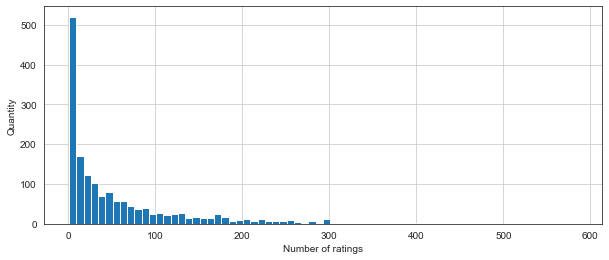

In [20]:
# Set up the figure size for our plot.
plt.figure(figsize=(10,4))

# Create histogram for the number of ratings.
ratings['num of ratings'].hist(bins=70)

# Add x and y axis labels.
plt.xlabel('Number of ratings')
plt.ylabel('Quantity')

Here we can quickly see the there is a large group of movies that have been rated only 1 time of very few times.

Text(0, 0.5, 'Quantity')

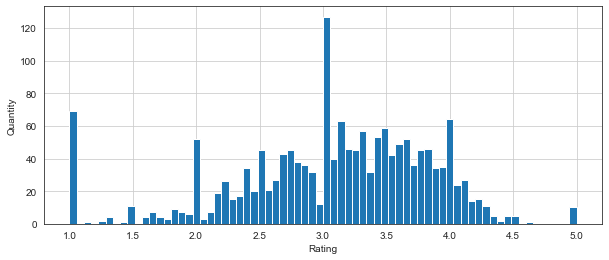

In [21]:
# Set up the figure size for our plot.
plt.figure(figsize=(10,4))

# Create histogram for the ratings.
ratings['rating'].hist(bins=70)

# Add x and y axis labels.
plt.xlabel('Rating')
plt.ylabel('Quantity')

We notice a few things:
- There are around 70 movies with a rating of 1. This could be due to the high number of movies rated very few times, and maybe those are movies that we just rated once with a 1 score.
- We could say the same thing for movies with a perfect score of 5. Maybe they were rated just once with a perfect score.
- The most common score in our data is around 3.

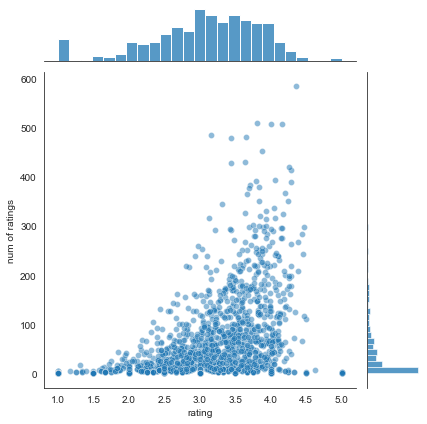

In [22]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

The jointplot is more helpful to identify the data distribution on the DataFrame.

We can agree that most of the movies have a score between 3 and 4, which makes sense if you have a lot of people with different taste rating the movies.

The amount of ratings for the movies usually don't go over 100, and we definitely have a large group of movies that were rated only once or very few times.

All right! now that we have a better idea of what the data looks like, let's proceed and try to create our simple recommendation system.

## Movie Recommender

Let's create a matrix were we will have our user ids and movie titles on the axis. This way, each cell in the matrix will contain the rating that an specific user gave to a certain movie.

What will this generate? It would be something like a ... vector, right?

So, maybe we can see which vectors are similar to one another, which will indicate users behaviour similarities. Therefore, we could find movies to recommend to users with similar tastes? Let's see ...

In [23]:
# Create a pivot table where user_id is the index and the columns will be the movie titles.
movie_matrix = movies.pivot_table(index='user_id',columns='title',values='rating')

# Head of the DataFrame.
movie_matrix.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, let's choose two movies from our most rated movies.

In [25]:
ratings.sort_values('num of ratings', ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's go with Return of the Jedi, and Toy Story. Why not ...

In [43]:
rotj_user_ratings = movie_matrix['Return of the Jedi (1983)']
toystory_user_ratings = movie_matrix['Toy Story (1995)']

Let's check the user ratings for Return of the Jedi.

In [44]:
rotj_user_ratings.head(10)

user_id
0    NaN
1    5.0
2    NaN
3    4.0
4    NaN
5    5.0
6    NaN
7    3.0
8    4.0
9    NaN
Name: Return of the Jedi (1983), dtype: float64

Let's check the user ratings for Toy Story.

In [45]:
toystory_user_ratings.head(10)

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
5    4.0
6    4.0
7    NaN
8    NaN
9    NaN
Name: Toy Story (1995), dtype: float64

Now, we will use the corrwith() function to get correlations between two series. In this case, we will get the correlations between our movie_matrix and the rotj_user_ratings.

In [46]:
# Obtain the correlation between movie_ratings and rotj_user_ratings.
similar_to_rotj = movie_matrix.corrwith(rotj_user_ratings)

# Create new DataFrame with the correlation values obtained.
corr_rotj = pd.DataFrame(similar_to_rotj,columns=['Correlation'])

# Drop NaN values on the DataFrame.
corr_rotj.dropna(inplace=True)

# Sort by Correlation (descending)
corr_rotj.sort_values('Correlation', ascending=False).head(10)

D:\Anaconda\envs\Udemy-DS-ML-Python\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Anaconda\envs\Udemy-DS-ML-Python\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
Stripes (1981),1.0
Guantanamera (1994),1.0
Manny & Lo (1996),1.0
"Quiet Room, The (1996)",1.0
Return of the Jedi (1983),1.0
A Chef in Love (1996),1.0
Cosi (1996),1.0
Mrs. Dalloway (1997),1.0
King of the Hill (1993),1.0


Does this make sense? ... Not really, right?

Let's remember that we have a large group of movies with just once or few reviews. Could this be a problem? Let's try to filter them out, and see what we get back.

In [47]:
# Join our correlations DataFrame with the number of ratings.
corr_rotj = corr_rotj.join(ratings['num of ratings'])

# Filter our movies with less than 100 reviews and sort the correlation values.
corr_rotj[corr_rotj['num of ratings'] > 100].sort_values('Correlation', ascending=False).head(10)

,Correlation,num of ratings
title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,368
Star Wars (1977),0.672556,584
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331
Sneakers (1992),0.412559,150
Back to the Future (1985),0.411901,350
"Frighteners, The (1996)",0.391322,115
True Lies (1994),0.364536,208


Now, this makes more sense! Which movies would we recommend if you have watched Return of the Jedi?

Of course, Empire Strikes Back, and Star Wars are the first ones to be recommended!

Then we have similar movies that also make more sense if you are into Star Wars. We have a little bit of action, adventure, and sci-fi.

Now, let's finish this with the example for Toy Story.

In [48]:
# Obtain the correlation between movie_ratings and toystory_user_ratings.
similar_to_toystory = movie_matrix.corrwith(toystory_user_ratings)

# Create new DataFrame with the correlation values obtained.
corr_toystory = pd.DataFrame(similar_to_toystory,columns=['Correlation'])

# Drop NaN values on the DataFrame.
corr_toystory.dropna(inplace=True)

# Sort by Correlation (descending)
corr_toystory.sort_values('Correlation', ascending=False).head(10)

# Join our correlations DataFrame with the number of ratings.
corr_toystory = corr_toystory.join(ratings['num of ratings'])

# Filter our movies with less than 100 reviews and sort the correlation values.
corr_toystory[corr_toystory['num of ratings'] > 100].sort_values('Correlation', ascending=False).head(10)

D:\Anaconda\envs\Udemy-DS-ML-Python\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Anaconda\envs\Udemy-DS-ML-Python\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129


## Last Words

If you have made it all the way until this point, awesome!

Thanks for taking the time to go through this simple Notebook, and if you have any feedback or comments, you can contact me via Email: jaimefvs@gmail.com